-----------------------
#### Next word prediction
--------------------

In [39]:
import numpy as np
np.set_printoptions(linewidth=120)

import keras

In [23]:
# source text
data = """ Jack and Jill went up the hill\n
            To fetch a pail of water\n
            Jack fell down and broke his crown\n
            And Jill came tumbling after\n """

In [24]:
from keras.preprocessing.text import Tokenizer

In [25]:
# integer encode text
tokenizer = Tokenizer()

In [26]:
tokenizer.fit_on_texts([data])

In [27]:
print(tokenizer.texts_to_sequences([data]))

[[2, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 2, 14, 15, 1, 16, 17, 18, 1, 3, 19, 20, 21]]


In [28]:
encoded = tokenizer.texts_to_sequences([data])[0]
print(encoded)

[2, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 2, 14, 15, 1, 16, 17, 18, 1, 3, 19, 20, 21]


In [29]:
# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 22


#### create word -> word sequences

In [30]:
sequences = list()

for i in range(1, len(encoded)):
    sequence = encoded[i-1:i+1]
    sequences.append(sequence)
    
print('Total Sequences: %d' % len(sequences))

Total Sequences: 24


In [31]:
sequences

[[2, 1],
 [1, 3],
 [3, 4],
 [4, 5],
 [5, 6],
 [6, 7],
 [7, 8],
 [8, 9],
 [9, 10],
 [10, 11],
 [11, 12],
 [12, 13],
 [13, 2],
 [2, 14],
 [14, 15],
 [15, 1],
 [1, 16],
 [16, 17],
 [17, 18],
 [18, 1],
 [1, 3],
 [3, 19],
 [19, 20],
 [20, 21]]

In [32]:
# split into X and y elements
sequences = np.array(sequences)
sequences

array([[ 2,  1],
       [ 1,  3],
       [ 3,  4],
       [ 4,  5],
       [ 5,  6],
       [ 6,  7],
       [ 7,  8],
       [ 8,  9],
       [ 9, 10],
       [10, 11],
       [11, 12],
       [12, 13],
       [13,  2],
       [ 2, 14],
       [14, 15],
       [15,  1],
       [ 1, 16],
       [16, 17],
       [17, 18],
       [18,  1],
       [ 1,  3],
       [ 3, 19],
       [19, 20],
       [20, 21]])

In [33]:
X, y = sequences[:,0],sequences[:,1]

In [132]:
X[:5], y[:5]

(array([2, 1, 3, 4, 5]),
 array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))

In [34]:
from keras.utils import to_categorical

In [35]:
# one hot encode outputs
y = to_categorical(y, num_classes=vocab_size)
y

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

In [38]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import LSTM, SimpleRNN

In [110]:
# define model
model = Sequential()

model.add(Embedding(input_dim=vocab_size, output_dim=10, input_length=1))

model.add(SimpleRNN(units=4))

model.add(Dense(vocab_size, activation='softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1, 10)             220       
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 4)                 60        
_________________________________________________________________
dense_2 (Dense)              (None, 22)                110       
Total params: 390
Trainable params: 390
Non-trainable params: 0
_________________________________________________________________
None


How did we get the number of parameters?

- g, no. of FFNNs in a unit (RNN has 1, GRU has 3, LSTM has 4)
- h, size of hidden units
- i, dimension/size of input

Since every FFNN has h(h+i) + h parameters, we have
- num_params = g × [h(h+i) + h]

In [111]:
g = 1
h = 4
i = 10

g * (h*(h+i) + h)

60

In [112]:
es = keras.callbacks.EarlyStopping(monitor='loss', patience=10)

In [113]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling

In [114]:
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# fit network
history = model.fit(X, 
                    y, 
                    epochs=1500, 
                    verbose=0, 
                    batch=
                    callbacks=[tfdocs.modeling.EpochDots(), es], 
                    validation_split=0.2)


Epoch: 0, acc:0.1579,  loss:3.0859,  val_acc:0.0000,  val_loss:3.1020,  
....................................................................................................
Epoch: 100, acc:0.4211,  loss:2.7626,  val_acc:0.0000,  val_loss:3.2312,  
....................................................................................................
Epoch: 200, acc:0.5263,  loss:2.1996,  val_acc:0.0000,  val_loss:3.4050,  
....................................................................................................
Epoch: 300, acc:0.6316,  loss:1.7706,  val_acc:0.0000,  val_loss:3.5200,  
....................................................................................................
Epoch: 400, acc:0.5263,  loss:1.4871,  val_acc:0.0000,  val_loss:3.5775,  
....................................................................................................
Epoch: 500, acc:0.6316,  loss:1.2879,  val_acc:0.0000,  val_loss:3.6312,  
..............................................

In [115]:
len(history.history['loss'])

1500

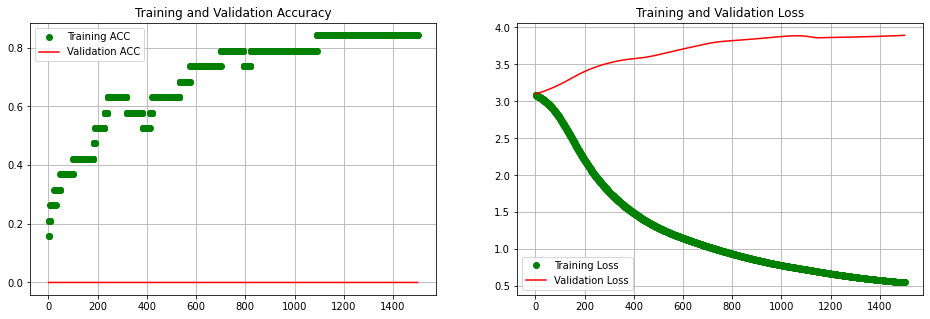

In [116]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(1, len(acc) + 1)

ax1.plot(epochs, acc, 'bo', label='Training ACC', c='g')
ax1.plot(epochs, val_acc, 'b', label='Validation ACC', c='r')
ax1.set_title('Training and Validation Accuracy')
ax1.legend()
ax1.grid()

ax2.plot(epochs, loss, 'bo', label='Training Loss', c='g')
ax2.plot(epochs, val_loss, 'b', label='Validation Loss', c='r')
ax2.set_title('Training and Validation Loss')
ax2.legend()
ax2.grid();

#### One-Word-In, One-Word-Out Sequences

Given one word as input, the model will learn to predict the next word in the sequence.

|X|		y|
|--|---------|
|Jack| 	and|
|and|	Jill|
|Jill|	went|

In [120]:
in_text = 'crown'

encoded = tokenizer.texts_to_sequences([in_text])[0]
encoded = array(encoded)

yhat = model.predict_classes(encoded, verbose=0)
yhat

array([3], dtype=int64)

In [121]:
tokenizer.word_index.items()

dict_items([('and', 1), ('jack', 2), ('jill', 3), ('went', 4), ('up', 5), ('the', 6), ('hill', 7), ('to', 8), ('fetch', 9), ('a', 10), ('pail', 11), ('of', 12), ('water', 13), ('fell', 14), ('down', 15), ('broke', 16), ('his', 17), ('crown', 18), ('came', 19), ('tumbling', 20), ('after', 21)])

In [122]:
tokenizer.index_word[1]

'and'

#### what is predict method (returns prob of each possible word)

In [128]:
model.predict(encoded, verbose=0)

array([[0.01530822, 0.05721232, 0.043708  , 0.09834064, 0.03889386, 0.02895545, 0.09333058, 0.02984241, 0.08557297,
        0.02498475, 0.03267596, 0.08636585, 0.05686065, 0.04168916, 0.06694944, 0.03208501, 0.04180742, 0.05617439,
        0.02252925, 0.01497945, 0.01608726, 0.01564703]], dtype=float32)

In [129]:
np.max(model.predict(encoded, verbose=0))

0.09834064

In [130]:
np.argmax(model.predict(encoded, verbose=0))

3

#### generate a sequence

In [123]:
# generate a sequence from the model
def generate_seq(model, tokenizer, seed_text, n_words):
    in_text, result = seed_text, seed_text
    
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        encoded = array(encoded)
        
        # predict a word in the vocabulary
        yhat = model.predict_classes(encoded, verbose=0)
        
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
                
        # append to input
        in_text, result = out_word, result + ' ' + out_word
    return result

In [124]:
generate_seq(model, tokenizer, 'Jack', 6)

'Jack and broke his crown jill and'

#### How the RNN arch played out